## 01. Import Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 02. Import Data

In [25]:
# define path

path = r'/Users/piperdutcher/Documents/Achievement 6'

In [38]:
# import data

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'grade_condition_flags.pkl'))

## 03. Cleaning / Preparing Data

In [32]:
# to make it so graphs don't need to be called specifically

%matplotlib inline

In [34]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude', 'longitude', 'sqft_living15', 'sqft_lot15', 'month',
       'year'],
      dtype='object')

In [36]:
## want to explore relationships between:

# sqft_living & price
# bedrooms & price
# sqft_living & sqft_living15

In [42]:
# create flag for yr_renovated
# if year == 0, then 'no'
# if year > 0 then ' yes'

# start with empty list

renovated = []

for r in df['yr_renovated']:
    if r == 0: 
        renovated.append('no')
    else:
        renovated.append('yes')

In [44]:
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [48]:
# add new column to data frame:

df['renovated'] = renovated
df['renovated'].value_counts()

renovated
no     20683
yes      914
Name: count, dtype: int64

In [50]:
df.shape

(21597, 26)

In [52]:
# all entries have either a yes or no for renovation status. export this version of our dataframe.

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'renovation_flags.pkl'))

## 03. Supervised Regression

In [100]:
## want to explore relationships between:

# sqft_living & price
# bedrooms & price
# sqft_living & sqft_living15
# price & renovation status

# Create objects that contain the model summary statistics (mean squared error & r2 score)
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

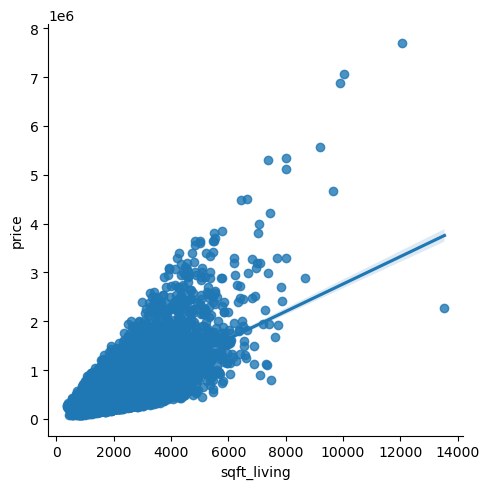

In [58]:
# start with scatterplot:
# sqft_living + price

sns.lmplot(x = 'sqft_living', y ='price', data = df)

State Hypothesis:

As the liveable squarefootage (sqft_living) increases, home price (price) will also increase.

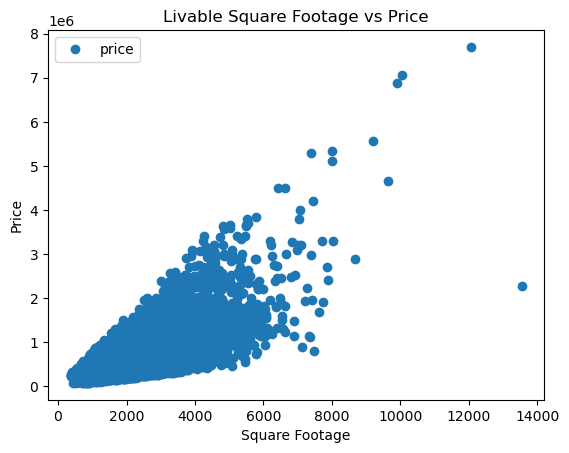

In [69]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Livable Square Footage vs Price')  
plt.xlabel('Square Footage')  
plt.ylabel('Price')  
plt.show()

In [73]:
# reshape the variables into NumPy Arrays: 
# X is the independent variable (sqft_livingsqft_living)
# y is the dependent variable (price)


X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [75]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [77]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [81]:
# split the data into a training and test set:
# 0.3 indicates that the test set will be 30% of the total data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
# create a regression object:

regression = LinearRegression()

In [85]:
# fit the training set:

regression.fit(X_train, y_train)

LinearRegression()

In [87]:
# predict the y values using X:

y_predicted = regression.predict(X_test)

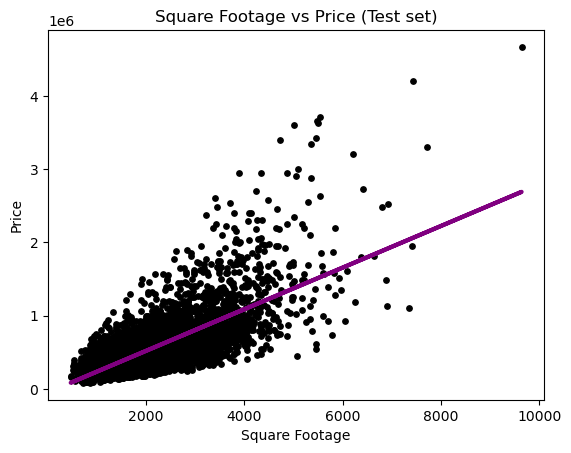

In [154]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =3)
plot_test.title('Square Footage vs Price (Test set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

In [102]:
# check the slope, rmse, r2 to evaluate model accuracy:

print(regression.coef_)
print(rmse)
print(r2)

[[284.19126315]]
62969438110.43802
0.49363331797741383


Based on the RMSE and the r2, this model is not a great fit. The variation of the RMSE is too high and the r2 is not as close to one as we would like.

In [107]:
# final (manual) check of predicted vs actual y values:

df_test1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_test1.head(25)

,Actual,Predicted
0,650000.0,1.075399e+06
1,625000.0,5.382774e+05
2,822500.0,8.281525e+05
3,490000.0,6.206929e+05
4,370000.0,8.452040e+05
5,737000.0,6.036414e+05
6,600000.0,5.098583e+05
7,390000.0,4.160752e+05
8,447055.0,6.457017e+05
9,850000.0,9.247775e+05


By comparing the actual and predicted y-values, we can see that this regression model is not going to be able to accurately predict the relationship between price and sqft_living. This means we can discard our hypothesis as there are likely other factors that determine home price better than just the squarefootage.

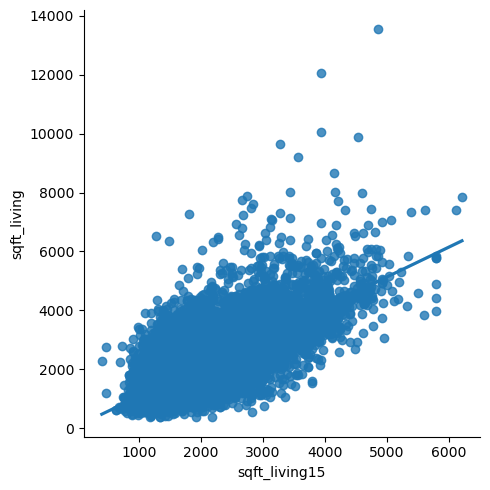

In [122]:
## conducting another supervised regression test:
# create a scatterplot with new variables: 

sns.lmplot(x = 'sqft_living15', y ='sqft_living', data = df)

State Hypothesis:

As the square footage of the nearest 15 neighbors home increases, the square footage of the home in question will also increase,

In [125]:
# reshape the variables into NumPy Arrays: 
# X2 is the independent variable (sqft_livingsqft_living)
# y2 is the dependent variable (price)


X2 = df['sqft_living15'].values.reshape(-1,1)
y2 = df['sqft_living'].values.reshape(-1,1)

In [127]:
X2

array([[1340],
       [1690],
       [2720],
       ...,
       [1020],
       [1410],
       [1020]])

In [129]:
y2

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [131]:
# split the data into a training and test set:
# 0.3 indicates that the test set will be 30% of the total data

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [133]:
# create a regression object:

regression2 = LinearRegression()

# fit the training set
y2_predicted = regression.predict(X2_test)

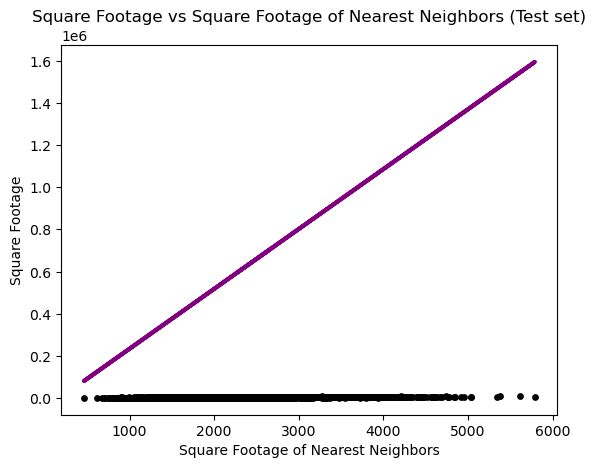

In [160]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='black', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='purple', linewidth = 3)
plot_test2.title('Square Footage vs Square Footage of Nearest Neighbors (Test set)')
plot_test2.xlabel('Square Footage of Nearest Neighbors')
plot_test2.ylabel('Square Footage')
plot_test2.show()

In [145]:
# Create objects that contain the model summary statistics (mean squared error & r2 score)
rmse2 = mean_squared_error(y2_test, y2_predicted) 
r2_2 = r2_score(y2_test, y2_predicted)

# check the rmse, r2 to evaluate model accuracy:
print(rmse2)
print(r2_2)

301944453148.1775
-363725.25880706025


Again, based on the rmse and the r squared values, we can see that this model is not a good fit and this hypothesis can be rejected. We will need to explore other variables to find a more suitable relationship.